# Лабораторная работа 2 — Исследовательский анализ данных (EDA)
**Вариант 6 — clients2.csv**

### 1) Загрузка датасета, info/describe, предварительная обработка

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('clients2.csv', sep=';')
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0
5,7446,1967,Master,Together,62513.0,0.0,09.09.2013,2.0
6,965,1971,Graduation,Divorced,55635.0,0.0,13.11.2012,4.0
7,6177,1985,PhD,Married,33454.0,1.0,08.05.2013,2.0
8,4855,1974,PhD,Together,30351.0,1.0,06.06.2013,1.0
9,5899,1950,PhD,Together,5648.0,1.0,13.03.2014,1.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 796 non-null    int64  
 1   Year_Birth         796 non-null    int64  
 2   Education          796 non-null    object 
 3   Marital_Status     796 non-null    object 
 4   Income             784 non-null    float64
 5   Kidhome            795 non-null    float64
 6   Dt_Customer        795 non-null    object 
 7   NumDealsPurchases  795 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 49.9+ KB


In [59]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
count,796.000000,796.000000,796,796,784.00000,795.000000,795,795.000000
unique,NaN,NaN,4,8,NaN,NaN,469,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,22.05.2014,NaN
freq,NaN,NaN,444,305,NaN,NaN,6,NaN
mean,5630.133166,1968.356784,NaN,NaN,53130.07398,0.438994,NaN,2.314465
std,3273.039715,12.022132,NaN,NaN,21818.56876,0.547252,NaN,1.941650
min,0.000000,1899.000000,NaN,NaN,2447.00000,0.000000,NaN,0.000000
25%,2853.000000,1959.000000,NaN,NaN,36141.75000,0.000000,NaN,1.000000
50%,5563.000000,1969.500000,NaN,NaN,52372.50000,0.000000,NaN,2.000000
75%,8584.250000,1977.000000,NaN,NaN,69293.25000,1.000000,NaN,3.000000


In [60]:
print('Поиск неявных дубликатов:')
print(df['Education'].unique())
print(df['Marital_Status'].unique())

Поиск неявных дубликатов:
['Graduation' 'PhD' 'Master' 'Basic']
['Single' 'Together' 'Married' 'Divorced' 'MARRIED' 'SINGL' 'Widow'
 'Alone']


In [61]:
df['Marital_Status'] =  df['Marital_Status'].replace('MARRIED','Married')
df['Marital_Status'] =  df['Marital_Status'].replace('SINGL','Single')
print('Результат работы:')
print(df['Education'].unique())
print(df['Marital_Status'].unique())

Результат работы:
['Graduation' 'PhD' 'Master' 'Basic']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']


In [62]:
print('Выполнено удаление явных дубликатов.')
df = df.drop_duplicates().reset_index(drop=True)

Выполнено удаление явных дубликатов.


In [63]:
#Приведение типов и первичные проверки
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, errors='coerce')

#Сколько пропусков стало после парсинга
print("Пропуски по колонкам:\n", df.isnull().sum())

#Проверка уникальности ID
print("Всего строк:", len(df))
print("Уникальных ID:", df['ID'].nunique())
print("Дубликатов (после drop_duplicates):", df.duplicated().sum())


Пропуски по колонкам:
 ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               12
Kidhome               1
Dt_Customer           1
NumDealsPurchases     1
dtype: int64
Всего строк: 792
Уникальных ID: 792
Дубликатов (после drop_duplicates): 0


In [64]:
print("Строки с пропущенным Income:")
display(df[df['Income'].isna()].head(10))

print("Строки с пропущенным Dt_Customer:")
display(df[df['Dt_Customer'].isna()].head(10))

print("Строки с пропущенным NumDealsPurchases:")
display(df[df['NumDealsPurchases'].isna()].head(10))


Строки с пропущенным Income:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
10,1994,1983,Graduation,Married,NaN,NaN,NaT,NaN
26,5255,1986,Graduation,Single,NaN,1.0,2013-02-20,0.0
41,7281,1959,PhD,Single,NaN,0.0,2013-11-05,1.0
45,7244,1951,Graduation,Single,NaN,2.0,2014-01-01,3.0
55,8557,1982,Graduation,Single,NaN,1.0,2013-06-17,2.0
83,8996,1957,PhD,Married,NaN,2.0,2012-11-19,12.0
84,9235,1957,Graduation,Single,NaN,1.0,2014-05-27,1.0
85,5798,1973,Master,Together,NaN,0.0,2013-11-23,1.0
116,8268,1961,PhD,Married,NaN,0.0,2013-07-11,3.0
121,1295,1963,Graduation,Married,NaN,0.0,2013-08-11,1.0


Строки с пропущенным Dt_Customer:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
10,1994,1983,Graduation,Married,NaN,NaN,NaT,NaN


Строки с пропущенным NumDealsPurchases:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
10,1994,1983,Graduation,Married,NaN,NaN,NaT,NaN


In [65]:
#Аномальные года рождения
display(df[df['Year_Birth'] < 1920][['ID','Year_Birth','Dt_Customer','Income','Education','Marital_Status']].head(20))
display(df[df['Year_Birth'] > 2006][['ID','Year_Birth','Dt_Customer','Income','Education','Marital_Status']].head(20))

#Возраст при регистрации (Age at registration)
df['AgeReg'] = df['Dt_Customer'].dt.year - df['Year_Birth']
display(df[['ID','Year_Birth','Dt_Customer','AgeReg']].sort_values('AgeReg').head(5))
display(df[['ID','Year_Birth','Dt_Customer','AgeReg']].sort_values('AgeReg', ascending=False).head(5))

#Посмотрим подозрительные возрастные значения
display(df[(df['AgeReg'] < 14) | (df['AgeReg'] > 100)][['ID','Year_Birth','Dt_Customer','AgeReg','Income']].head(20))


,ID,Year_Birth,Dt_Customer,Income,Education,Marital_Status
313,1150,1899,2013-09-26,83532.0,PhD,Together


,ID,Year_Birth,Dt_Customer,Income,Education,Marital_Status


,ID,Year_Birth,Dt_Customer,AgeReg
685,10548,1995,2014-03-09,19.0
637,8315,1995,2014-03-26,19.0
128,821,1992,2012-10-19,20.0
385,5067,1994,2014-02-14,20.0
762,8560,1992,2012-09-10,20.0


,ID,Year_Birth,Dt_Customer,AgeReg
313,1150,1899,2013-09-26,114.0
392,6932,1941,2013-04-13,72.0
384,7106,1943,2014-03-31,71.0
37,2968,1943,2013-02-01,70.0
479,3711,1944,2014-03-01,70.0


,ID,Year_Birth,Dt_Customer,AgeReg,Income
313,1150,1899,2013-09-26,114.0,83532.0


In [66]:
#Посчитаем сколько строк с пропущенным Income было и удалим их
before = len(df)
missing_income_count = df['Income'].isna().sum()
print("Строк с пропущенным Income (до удаления):", missing_income_count)

#Удаляем строки с NaN в Income
df = df.dropna(subset=['Income']).reset_index(drop=True)

after = len(df)
print("Удалено строк:", before - after)
print("Текущий размер набора:", after)


Строк с пропущенным Income (до удаления): 12
Удалено строк: 12
Текущий размер набора: 780


In [67]:
#Заполним единичные пропуски нулями
df['Kidhome'] = df['Kidhome'].fillna(0).astype(int)
df['NumDealsPurchases'] = df['NumDealsPurchases'].fillna(0).astype(int)


In [68]:
#Посмотрим, сколько строк попадает под правило "вне диапазона"
bad_age = df[(df['AgeReg'] < 14) | (df['AgeReg'] > 100)]
print("Строк с подозрительным возрастом:", len(bad_age))
display(bad_age[['ID','Year_Birth','Dt_Customer','AgeReg','Income']])


Строк с подозрительным возрастом: 1


,ID,Year_Birth,Dt_Customer,AgeReg,Income
301,1150,1899,2013-09-26,114.0,83532.0


In [69]:
#Удаляем явные аномалии
mask = (df['AgeReg'] >= 14) & (df['AgeReg'] <= 100)
before = len(df)
df = df[mask].reset_index(drop=True)
after = len(df)
print("Удалено строк:", before - after)
print("Текущий размер набора:", after)



Удалено строк: 1
Текущий размер набора: 779


In [70]:
#Пересчитаем AgeReg и приведём к int
df['AgeReg'] = (df['Dt_Customer'].dt.year - df['Year_Birth']).astype(int)


In [71]:
print("Текущий размер набора:", len(df))
print("Пропусков по колонкам:\n", df.isnull().sum())


Текущий размер набора: 779
Пропусков по колонкам:
 ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Dt_Customer          0
NumDealsPurchases    0
AgeReg               0
dtype: int64


In [72]:
df.info()
df.describe(include='all')
df = df.reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 779 non-null    int64         
 1   Year_Birth         779 non-null    int64         
 2   Education          779 non-null    object        
 3   Marital_Status     779 non-null    object        
 4   Income             779 non-null    float64       
 5   Kidhome            779 non-null    int64         
 6   Dt_Customer        779 non-null    datetime64[ns]
 7   NumDealsPurchases  779 non-null    int64         
 8   AgeReg             779 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 54.9+ KB


На этапе первичного просмотра выполнены df.info() и df.describe(), что позволило получить общее представление о составе данных и обнаружить пропуски и несоответствия типов. Исходный набор содержал 796 строк и столбцы: ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Dt_Customer, NumDealsPurchases.

Выполнена очистка дубликатов: обнаружены и удалены 4 полностью идентичных записи. Столбец Dt_Customer приведён к типу datetime с параметром dayfirst=True (формат дат в файле — DD.MM.YYYY), что позволяет корректно рассчитывать временные признаки. Кроме того, были нормализованы значения в Marital_Status и другие несущественные текстовые поправки для унификации категорий.

Проведена работа с пропусками: для признака Income обнаружено 12 пропущенных значений. Поскольку доля пропусков мала (~1.5% от исходного объёма), принято решение удалить записи с отсутствующим Income для упрощения EDA; Также заполнены единичные пропуски в Kidhome и NumDealsPurchases нулями и приведены эти столбцы к целочисленному типу.

Для анализа временных и возрастных характеристик добавлен признак AgeReg = год регистрации (Dt_Customer) минус Year_Birth. Выявлена одна явная аномалия по году рождения (Year_Birth = 1899, соответствующая AgeReg = 114), которая была удалена как ошибочная запись согласно правилу исключения возрастных аномалий (AgeReg < 14 или AgeReg > 100). После всех операций (удаление дубликатов, удаление строк с пропущенным Income, исключение возрастной аномалии) итоговый объём выборки составил 779 наблюдений.

Все типы колонок пересмотрены и приведены в соответствие: Dt_Customer — datetime, Income — float, Kidhome и NumDealsPurchases — int, добавлено служебное поле AgeReg.

### 2) Матрица диаграмм рассеяния и scatter по категориям

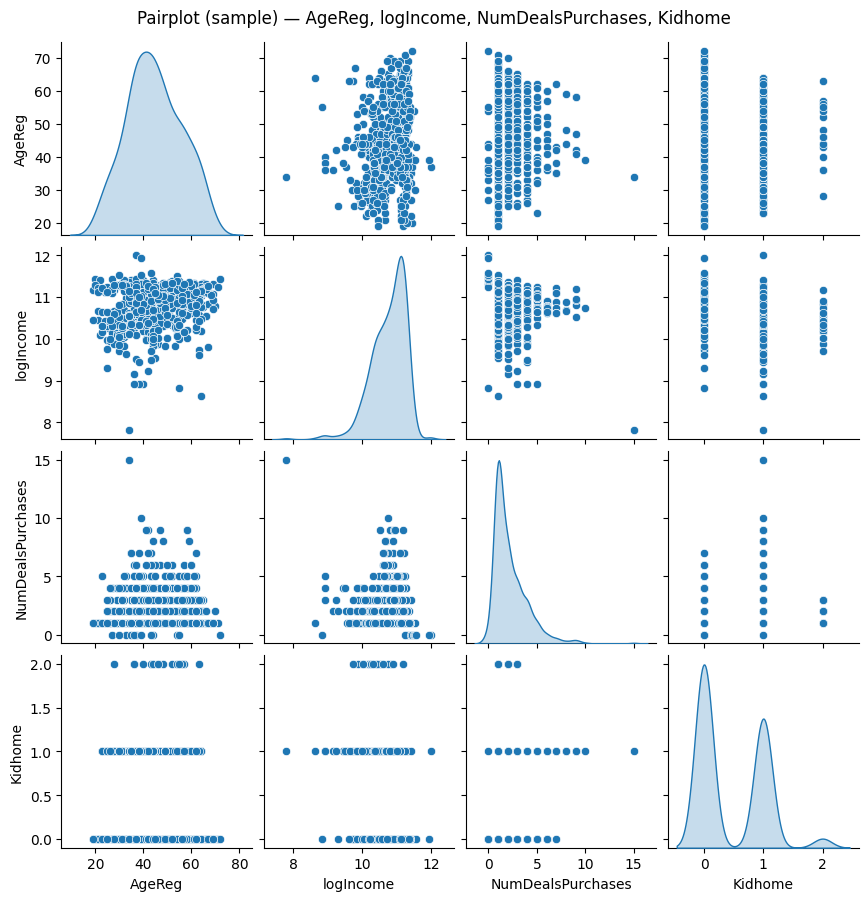

In [73]:
num_cols = ['AgeReg', 'Income', 'NumDealsPurchases', 'Kidhome']
#возьмём подвыборку для pairplot чтобы не перегружать рисунок
sample = df[num_cols].dropna().sample(n=min(600, len(df)), random_state=1).copy()

#добавим лог-инком для анализа (не заменяем Income, добавляем колонку)
sample['logIncome'] = np.log1p(sample['Income'])

#------------- Pairplot (с logIncome вместо raw Income) -------------
sns.pairplot(sample[['AgeReg','logIncome','NumDealsPurchases','Kidhome']], 
             diag_kind='kde', height=2.2)
plt.suptitle('Pairplot (sample) — AgeReg, logIncome, NumDealsPurchases, Kidhome', y=1.02)
plt.show()

1. Диагональные графики (оценки распределений):

    AgeReg: распределение примерно колоколообразное, максимум около 30–50 лет; есть редкие молодые/пожилые значения. Средний возраст регистрации ~44 года (из предыдущих расчётов).

    logIncome: после лог-преобразования распределение близко к нормальному (узкий пик около 10.5–11), то есть лог полезно «сжало» правый хвост.

    NumDealsPurchases: сильно правосторонне скошенное распределение (большинство клиентов делают 0–3 сделки, встречаются редкие клиенты с большим числом сделок до ~15).

    Kidhome: дискретное мультимодальное распределение (только значения 0,1,2) — явные столбцы на графике.

2. Попарные зависимости (scatter):

    AgeReg vs logIncome: облако точек довольно рыхлое, явной сильной линейной зависимости нет, но заметна слабая положительная тенденция (у более старших немного выше лог-доход в среднем). Это подтверждается регресс-плотом, где наклон небольшой. Вывод: слабая положительная связь, но она очень слабая — модель с AgeReg вряд ли предскажет Income высоко точно.

    logIncome vs NumDealsPurchases: точки сгущены при средних значениях logIncome (~10.5–11) и небольших NumDealsPurchases (0–4). Видно, что клиенты с очень большим числом сделок чаще лежат в диапазоне среднего logIncome, но общей однозначной зависимости нет — связь слабая/отсутствует.

    AgeReg vs NumDealsPurchases: нет заметной линейной связи (разброс точек равномерный по возрастам); максимум плотности — у клиентов среднего возраста и небольшого числа сделок. Корреляция близка к нулю.

    Kidhome с любой непрерывной переменной: четко видно дискретность Kidhome — вертикальные полосы (три категории). При этом:

    Kidhome vs logIncome / Income: видно, что при больших значениях Kids (1 или 2) распределение доходов немного смещено — в целом в данных наблюдается отрицательная связь между Kidhome и Income (в целом: больше детей — ниже доход в среднем). Это прослеживается в тепловой карте корреляций (Kidhome ↔ Income ≈ −0.51).

    Kidhome vs NumDealsPurchases: слабая положительная связь — владельцы детей немного чаще делают сделки (но эффект слабый).

3. Структура данных и «полосы/сетки»:

    Для дискретных признаков (Kidhome, NumDealsPurchases) видны чёткие вертикальные/горизонтальные линии — это ожидаемо и подсказывает, что при моделировании эти признаки нужно учитывать как счётные/категориальные.

    Наличие нескольких точечных выбросов: по доходу (высокие значения ~150–160k) и по числу сделок (мало, но есть клиенты с 10+ покупками). В лог-преобразовании доходы «сжаты», но выбросы по абсолютному доходу всё ещё существуют.

4. Практические выводы и последствия для дальнейшего анализа/моделирования:

    В данных нет сильных линейных связей между большинством пар признаков — корреляции (см. матрицу) маленькие (за исключением ожидаемой высокой связи Income ↔ logIncome и заметной отрицательной связи Income ↔ Kidhome).

    Для предсказания Income одиночными признаками (AgeReg, NumDealsPurchases и т.п.) сильного эффекта ждать не стоит — нужен набор признаков или более сложные модели (не линейные), либо привлечение дополнительных признаков.

    Лог-преобразование дохода оправдано: распределение симметризовано, влияние правого хвоста уменьшено — это полезно для визуализаций и для методов, чувствительных к распределению признаков.

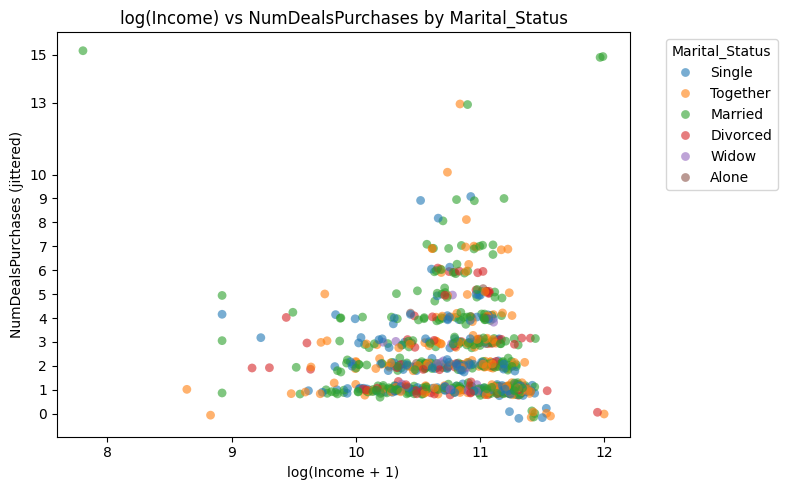

In [74]:
#------------- Scatter Income vs NumDealsPurchases (цвет по Marital_Status) -------------
#используем полный df, но с лог-инком и jitter по дискретной оси
plot_df = df[['Income','NumDealsPurchases','Marital_Status']].dropna().copy()
plot_df['logIncome'] = np.log1p(plot_df['Income'])
# jitter по y (NumDealsPurchases) для лучшей читаемости
plot_df['y_jitter'] = plot_df['NumDealsPurchases'] + np.random.normal(0, 0.12, size=len(plot_df))

plt.figure(figsize=(8,5))
sns.scatterplot(data=plot_df, x='logIncome', y='y_jitter', hue='Marital_Status',
                alpha=0.6, s=40, linewidth=0)
plt.yticks(sorted(plot_df['NumDealsPurchases'].unique()))
plt.xlabel('log(Income + 1)')
plt.ylabel('NumDealsPurchases (jittered)')
plt.title('log(Income) vs NumDealsPurchases by Marital_Status')
plt.legend(title='Marital_Status', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

* Концентрация данных: большая часть точек сосредоточена в диапазоне log(Income) ≈ 10.5–11.2 и NumDealsPurchases ≈ 0–4. То есть большинство клиентов имеют средний лог-доход и делают небольшое число покупок.

* Отсутствие сильной линейной связи: в общем облаке нет выраженной монотонной линии «чем выше доход — тем больше сделок». Корреляция между log(Income) и NumDealsPurchases слабая (мы это уже видели в таблице корреляций), и визуально тоже заметно: точки расплывчаты по вертикали во всех диапазонах дохода.

* Верхние хвосты и экстремы: есть отдельные точки с очень большим числом сделок (>8–10). Эти случаи единичны и встречаются для разных статусов (например, замужние/вместе). Они выглядят как “супер-покупатели”. Часть точек с очень высоким log(Income) (~12) при этом имеют и низкое, и высокое число сделок — богатые клиенты не обязательно самые активные по сделкам.

* Поведение по категориям (Marital_Status): по цветам видно, что распределения по статусам сильно перекрываются — single, together, married, divorced в основном занимают одинаковые области. Никакой семейный статус явно не «отличается» в смысле однозначно большего числа сделок или дохода. Малочисленные категории (Widow, Alone) представлены слабо и визуально не влияют.

* Jitter (смещение по Y): используется корректно, помогает увидеть плотности при дискретном счётном признаке NumDealsPurchases. Вертикальные полосы (до 15) видны, но большинство точек лежат на 0–4.

Pearson:
                    AgeReg  Income  logIncome  NumDealsPurchases  Kidhome
AgeReg              1.000   0.138      0.170              0.050   -0.253
Income              0.138   1.000      0.939             -0.053   -0.536
logIncome           0.170   0.939      1.000             -0.059   -0.510
NumDealsPurchases   0.050  -0.053     -0.059              1.000    0.183
Kidhome            -0.253  -0.536     -0.510              0.183    1.000

Spearman:
                    AgeReg  Income  logIncome  NumDealsPurchases  Kidhome
AgeReg              1.000   0.166      0.166              0.075   -0.286
Income              0.166   1.000      1.000             -0.190   -0.591
logIncome           0.166   1.000      1.000             -0.190   -0.591
NumDealsPurchases   0.075  -0.190     -0.190              1.000    0.231
Kidhome            -0.286  -0.591     -0.591              0.231    1.000


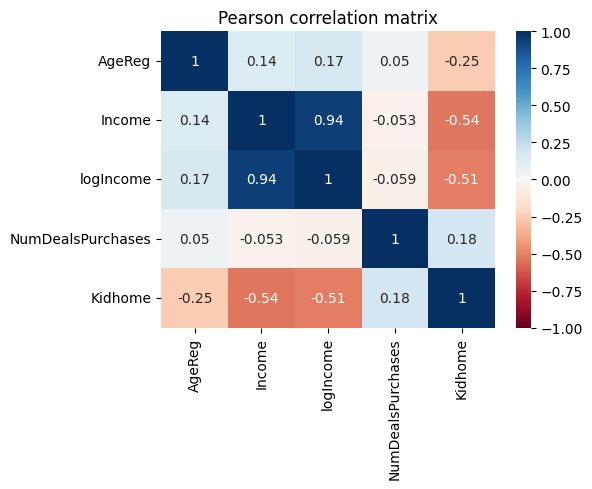

In [75]:
#Корреляции (Pearson и Spearman)
df['logIncome'] = np.log1p(df['Income'])
num_cols = ['AgeReg','Income','logIncome','NumDealsPurchases','Kidhome']
pearson = df[num_cols].corr(method='pearson').round(3)
spearman = df[num_cols].corr(method='spearman').round(3)
print("Pearson:\n", pearson)
print("\nSpearman:\n", spearman)

#heatmap (Pearson)
plt.figure(figsize=(6,5))
sns.heatmap(pearson, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Pearson correlation matrix')
plt.tight_layout()
plt.show()

* Очень сильная положительная связь Income ↔ logIncome (r ≈ 0.94).
— Ожидаемо: logIncome — монотонная трансформация Income, поэтому почти линейно связаны. Что значит на практике: в моделях регрессии оба признака вместе давать смысл не имеют (мультиколлинеарность). Используйте один из них (обычно логированную версию для нормализации).

* Отрицательная умеренная связь Kidhome ↔ Income и Kidhome ↔ logIncome (r ≈ -0.51 … -0.54).
— Интерпретация: наличие/количество детей ассоциируется со снижением дохода: клиенты с детьми в среднем имеют более низкие доходы. Это средняя тенденция, не правило для каждого человека.

* Слабая положительная связь AgeReg ↔ Income / logIncome (r ≈ 0.14–0.17).
— Интерпретация: с увеличением возраста (возраст при регистрации) доход немного растёт — эффект есть, но очень слабый.

* Слабая положительная связь NumDealsPurchases ↔ Kidhome (r ≈ 0.18).
— Интерпретация: клиенты с детьми немного чаще совершают сделки/покупки, но связь слабая.

* Почти нулевая связь NumDealsPurchases ↔ Income / logIncome (r ≈ -0.05 … -0.06).
— Интерпретация: линейной зависимости между доходом и числом сделок практически нет. Более богатые люди не обязательно делают больше сделок — для объяснения числа сделок нужен другой набор признаков.

* Отрицательная связь AgeReg ↔ Kidhome (r ≈ -0.25) — слабая/умеренная.
— Интерпретация: наблюдается тенденция, что клиенты с большим числом детей немного отличаются по возрасту регистрации (в среднем немного моложе/старше — эффект небольшой). Это стоит уточнить дополнительной проверкой, но связь не сильная.

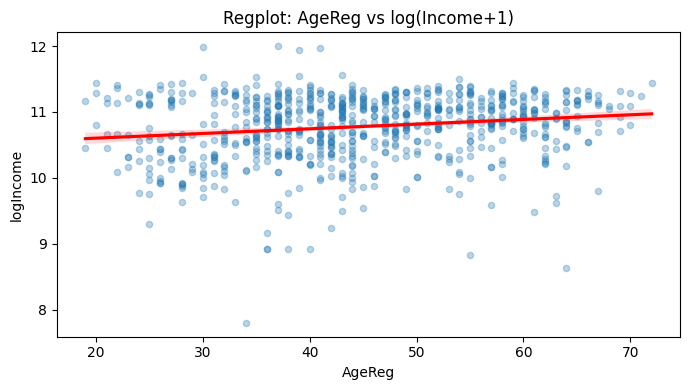

In [76]:
#Regplot: AgeReg vs logIncome (линейная + lowess)
plt.figure(figsize=(7,4))
sns.regplot(data=df, x='AgeReg', y='logIncome', scatter_kws={'alpha':0.3, 's':20}, line_kws={'color':'red'})
plt.title('Regplot: AgeReg vs log(Income+1)')
plt.tight_layout()
plt.show()


* Небольшой положительный наклон линии регрессии. Это значит, что в среднем с ростом возраста наблюдается небольшое увеличение дохода (в лог-шкале). Это согласуется с корреляцией, которую вы нашли (Pearson ≈ 0.14–0.17) — связь есть, но она слабая.

* Очень широкий разброс точек вокруг линии. Большая дисперсия по вертикали показывает, что возраст объясняет лишь небольшую долю вариации дохода. Проще: зная только возраст, мы плохо предсказываем доход — возраст даёт лишь небольшой вклад.

* Отдельные выбросы и «низкоинкомные» наблюдения встречаются во всех возрастных группах. Это значит, что есть люди и молодых, и старших возрастов с сильно отличающимся доходом — поведение не однородно.

* Нет ярко выраженной нелинейной формы (например, U-образной) — точки распределены примерно равномерно по всему диапазону возрастов, поэтому линейная аппроксимация здесь адекватна для первого приближения.

* Никакой явной сильной гетероскедастичности (т.е. систематического увеличения разброса остатков с возрастом) не наблюдается — разброс точек примерно сопоставим вдоль диапазона AgeReg.

##### Общий вывод по пункту:

В среднем матрица показывает только слабые линейные зависимости между основными числовыми признаками. Единственная заметная и практически значимая связь — отрицательная зависимость между числом детей (Kidhome) и доходом (умеренная по силе). Взаимосвязь между возрастом (AgeReg) и доходом слабая положительная; NumDealsPurchases практически не коррелирует с доходом.

* Возраст ↔ Доход. Есть слабая тенденция: с возрастом доход немного растёт (в среднем), но разброс доходов внутри возрастных групп большой — значит возраст не объясняет существенно вариацию дохода. На практике нельзя опираться на возраст как сильный предиктор дохода без дополнительных переменных.

* NumDealsPurchases ↔ Доход. Практически отсутствует линейная связь. Количество покупок по акциям не повышается с ростом дохода и не является прямым индикатором уровня дохода. Для описания поведения покупок лучше применять модели для счётных данных или сегментацию.

* Kidhome ↔ Доход. Наиболее интересный результат: больше детей ассоциируется с более низким доходом (умеренный по силе отрицательный коэффициент). Это устойчивый эффект в выборке (Spearman и Pearson оба значимы по модулю) и служит потенциально важным фактором сегментации/таргетинга.

Матрица диаграмм рассеяния (pairplot) и последующие регрессионные графики показывают, что явной линейной зависимости Income от AgeReg не наблюдается — коэффициенты корреляции невысоки (Pearson ≈ 0.17, Spearman ≈ 0.17). Лог-преобразование дохода (log(Income+1)) устраняет влияние выбросов и делает распределение более симметричным, однако связь с возрастом остаётся слабой. Наблюдается умеренно сильная отрицательная связь между количеством детей (Kidhome) и доходом (Spearman ≈ -0.59), что следует учитывать при сегментации; напротив, число акций/сделок (NumDealsPurchases) не связано с доходом в линейном выражении и требует отдельного анализа (возможно, count-модель или сегментация по активным покупателям).

### 3) Гистограммы с оптимальными bins

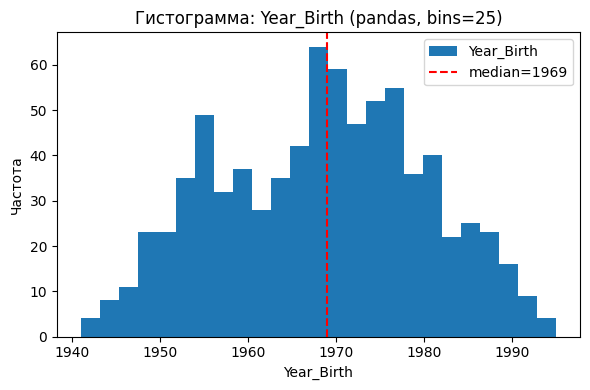

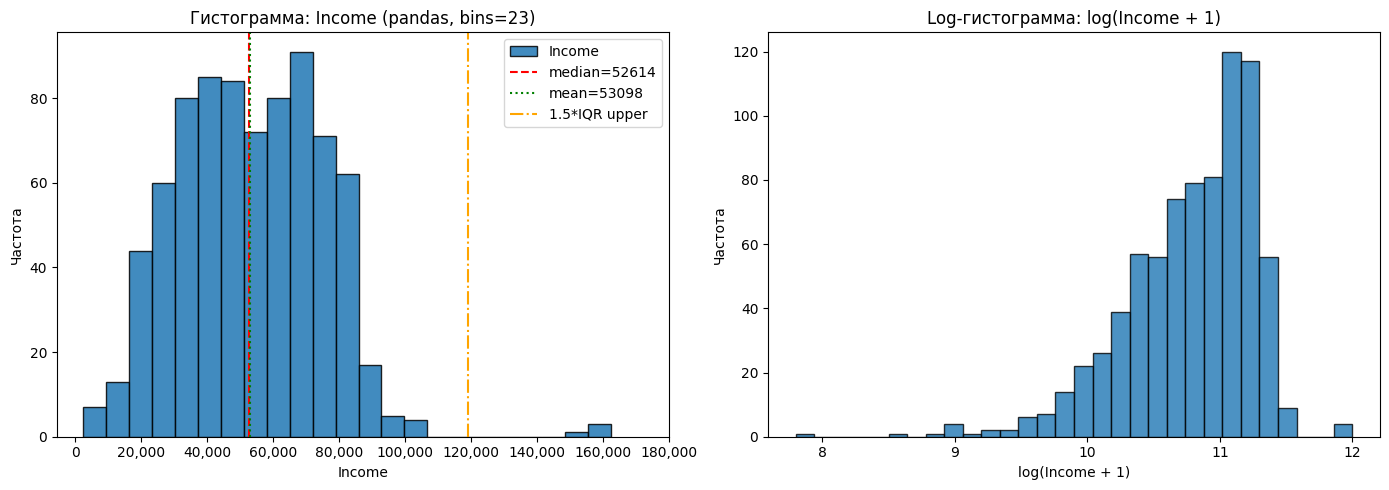

median = 52614, mean = 53098
IQR upper threshold (1.5*IQR) = 119235.75; count above threshold = 4


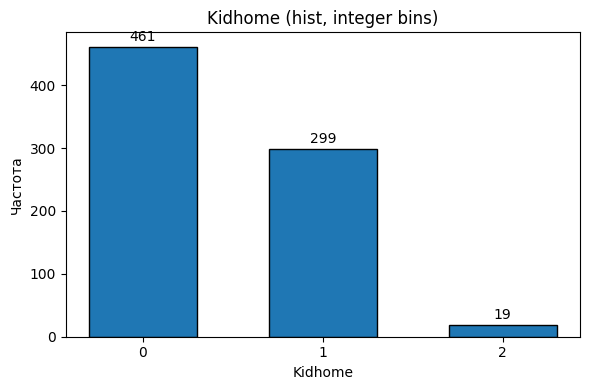

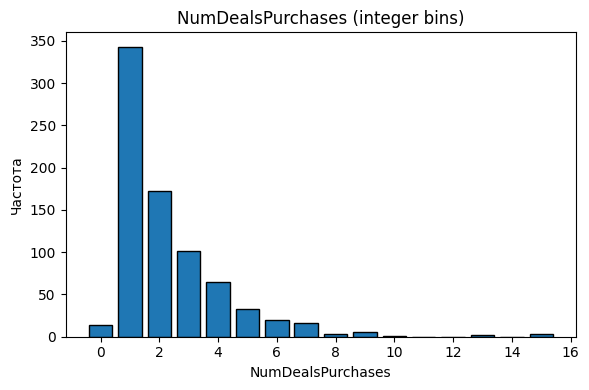

In [77]:
plt.figure(figsize=(6,4))
df['Year_Birth'].plot(kind='hist', bins=25)
plt.title('Гистограмма: Year_Birth (pandas, bins=25)')
plt.xlabel('Year_Birth')
plt.ylabel('Частота')
plt.axvline(df['Year_Birth'].median(), color='red', linestyle='--', label=f"median={int(df['Year_Birth'].median())}")
plt.legend()
plt.tight_layout()
plt.show()

income = df['Income'].dropna()
median_income = income.median()
mean_income = income.mean()
q1, q3 = income.quantile([0.25, 0.75])
iqr = q3 - q1
upper_thr = q3 + 1.5 * iqr
n_outliers = (income > upper_thr).sum()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

#левая: pandas.hist
ax = income.plot(kind='hist', bins=23, edgecolor='black', alpha=0.85, ax=axes[0])
ax.axvline(median_income, color='red', linestyle='--', linewidth=1.5, label=f'median={int(median_income)}')
ax.axvline(mean_income, color='green', linestyle=':', linewidth=1.5, label=f'mean={int(mean_income)}')
ax.axvline(upper_thr, color='orange', linestyle='-.', linewidth=1.5, label='1.5*IQR upper')
ax.set_title('Гистограмма: Income (pandas, bins=23)')
ax.set_xlabel('Income')
ax.set_ylabel('Частота')

#Получаем позиции тиков и составляем строковые метки с разделителем тысяч
ticks = ax.get_xticks()
#Обрезаем отрицательные/лишние тики, если нужно
ticks = ticks[(ticks >= 0)]
ax.set_xticks(ticks)  # явно установить тики
ax.set_xticklabels([f"{int(t):,}" for t in ticks])  # формат с запятыми, например "52,614"

ax.legend()

#правая: лог-гистограмма
log_income = np.log1p(income)
ax2 = log_income.plot(kind='hist', bins=30, edgecolor='black', alpha=0.8, ax=axes[1])
ax2.set_title('Log-гистограмма: log(Income + 1)')
ax2.set_xlabel('log(Income + 1)')
ax2.set_ylabel('Частота')

plt.tight_layout()
plt.show()

print(f"median = {median_income:.0f}, mean = {mean_income:.0f}")
print(f"IQR upper threshold (1.5*IQR) = {upper_thr:.2f}; count above threshold = {n_outliers}")

vals = df['Kidhome'].dropna().astype(int)

#bins от -0.5 до max+0.5 с шагом 1 — чтобы 0,1,2 занимали целые бины
bins = np.arange(vals.min()-0.5, vals.max()+1.5, 1)

plt.figure(figsize=(6,4))
n, bins_out, patches = plt.hist(vals, bins=bins, rwidth=0.6, edgecolor='black', align='mid')
plt.title('Kidhome (hist, integer bins)')
plt.xlabel('Kidhome')
plt.ylabel('Частота')
plt.xticks([0,1,2])  # явные метки
#подписи над столбиками
for x, height in zip((bins[:-1] + bins[1:]) / 2, n):
    plt.text(x, height + max(n)*0.01, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
bins = np.arange(df['NumDealsPurchases'].min()-0.5, df['NumDealsPurchases'].max()+1.5, 1)
plt.hist(df['NumDealsPurchases'], bins=bins, rwidth=0.8, edgecolor='black')
plt.title('NumDealsPurchases (integer bins)')
plt.xlabel('NumDealsPurchases'); plt.ylabel('Частота')
plt.tight_layout()
plt.show()

#### Гистограмма №1.
Распределение годов рождения близко к нормальному (колоколообразному) с центром в конце 1960-х — начале 1970-х; медиана отмечена на графике и равна 1969. Большая часть наблюдений сосредоточена примерно в диапазоне 1950–1980 гг., экстремальных «вторых пиков» не наблюдается — распределение относительно симметрично вокруг центра.

#### Гистограмма №2.
Показывает, что распределение дохода сильно скошено вправо: основная масса наблюдений сосредоточена примерно в диапазоне ~20k–90k, медиана = 52 614, среднее ≈ 53 098. По правилу 1.5·IQR верхний порог ≈ 119 236, наблюдений выше этого порога — 4 (небольшая группа высокодоходных клиентов).

Правая панель (логарифм log(Income+1)) демонстрирует, что после лог-преобразования распределение становится более симметричным и «нормоподобным» — это подтверждает, что скошенность объясняется несколькими высокими значениями, а не фундаментальной мультимодальностью основной массы.

#### Гистограмма №3.
Признак Kidhome дискретный: большинство клиентов не имеют детей (461, 59.2%), значительная часть — имеют одного ребёнка (299, 38.4%), наличие двух детей встречается редко (19, 2.4%). Признак заполнен для всех наблюдений и целесообразно использовать его как категориальный при сегментации и построении моделей (возможна классификация в категории 0, 1, 2+ для устойчивости оценок).

#### Гистограмма №4.
Распределение числа покупок по акциям (NumDealsPurchases) сконцентрировано на низких значениях: большинство клиентов совершили 1–3 таких покупок (мода = 1, среднее ≈ 2.3, максимум = 15).

### 4) Корреляция/ковариация и heatmap

,Income,Kidhome,NumDealsPurchases,AgeReg,logIncome
Income,1.000000,-0.535748,-0.053436,0.138134,0.938916
Kidhome,-0.535748,1.000000,0.182894,-0.253162,-0.510110
NumDealsPurchases,-0.053436,0.182894,1.000000,0.050001,-0.059371
AgeReg,0.138134,-0.253162,0.050001,1.000000,0.169915
logIncome,0.938916,-0.510110,-0.059371,0.169915,1.000000


,Income,Kidhome,NumDealsPurchases,AgeReg,logIncome
Income,4.779108e+08,-6357.152062,-2243.211345,35577.884179,10074.018681
Kidhome,-6.357152e+03,0.294617,0.190629,-1.618952,-0.135892
NumDealsPurchases,-2.243211e+03,0.190629,3.687431,1.131221,-0.055955
AgeReg,3.557788e+04,-1.618952,1.131221,138.807251,0.982518
logIncome,1.007402e+04,-0.135892,-0.055955,0.982518,0.240882


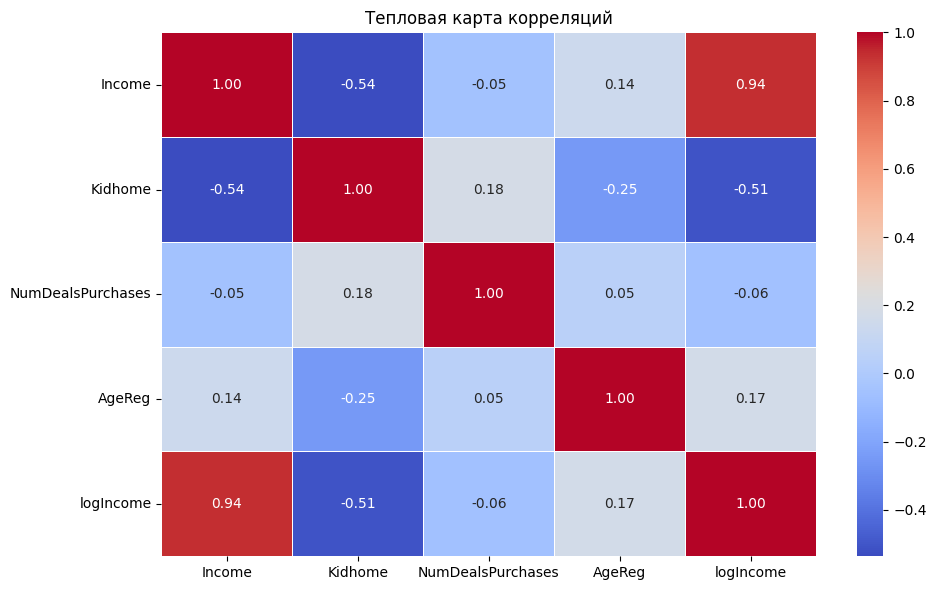

In [78]:
#=== Корреляция/ковариация и heatmap ===
num_df = df.select_dtypes(include='number').copy()
num_df = num_df.drop(columns=['ID'], errors='ignore')
num_df = num_df.drop(columns=['Year_Birth'], errors='ignore')


#Таблицы корреляций и ковариаций (просто как таблицы, без графика)
corr = num_df.corr(numeric_only=True)
cov  = num_df.cov()
display(corr)
display(cov)

#Один-единственный heatmap, если есть ≥ 2 числовых признака
if num_df.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
    plt.title('Тепловая карта корреляций')
    plt.tight_layout()
    plt.show()
else:
    print("Слишком мало числовых признаков для heatmap.")


Рассчитаны матрицы корреляции и ковариации по числовым признакам, построена тепловая карта корреляций. Основные результаты: сильная положительная связь между Income и logIncome (r ≈ 0.94), умеренно сильная отрицательная связь между Kidhome и доходом (r ≈ −0.51), слабая положительная связь между AgeReg и доходом (r ≈ 0.17), и практически нулевая линейная связь NumDealsPurchases ↔ Income. Ковариационная матрица приведена для полноты, но для сравнения силы взаимосвязей использованы нормированные показатели (корреляции).

### 5) Hexbin график

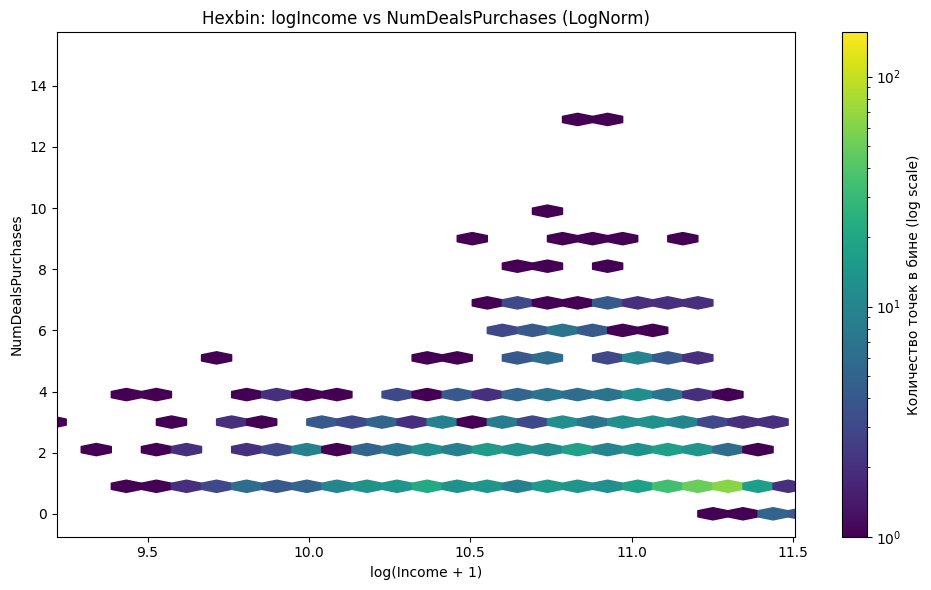

In [79]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,6))
hb = plt.hexbin(df['logIncome'], df['NumDealsPurchases'],
                gridsize=45, cmap='viridis', mincnt=1,
                norm=LogNorm(vmin=1, vmax=df.shape[0]/5))   # vmax можно подобрать
cb = plt.colorbar(hb)
cb.set_label('Количество точек в бине (log scale)')
plt.xlabel('log(Income + 1)')
plt.ylabel('NumDealsPurchases')
plt.title('Hexbin: logIncome vs NumDealsPurchases (LogNorm)')
plt.xlim(df['logIncome'].quantile(0.01), df['logIncome'].quantile(0.99))
plt.tight_layout()
plt.show()

На hexbin-графике зависимости log(Income + 1) от NumDealsPurchases видно, что основная масса клиентов сосредоточена в диапазоне logIncome ≈ 10.5–11.0 (приблизительно 36–60 тыс.) и NumDealsPurchases ≈ 0–4. Это означает, что большинство клиентов имеет средний доход и совершает относительно небольшое число покупок. При этом строгой положительной линейной зависимости «чем выше доход — тем больше покупок» не наблюдается: при сходных доходах встречается широкий разброс по количеству покупок. Выбросы с очень высоким доходом и/или большим числом покупок есть, но они редки. Следовательно, для предсказания покупательной активности одного только дохода недостаточно — следует учитывать дополнительные характеристики клиентов.

### 6) Boxplot по одному столбцу

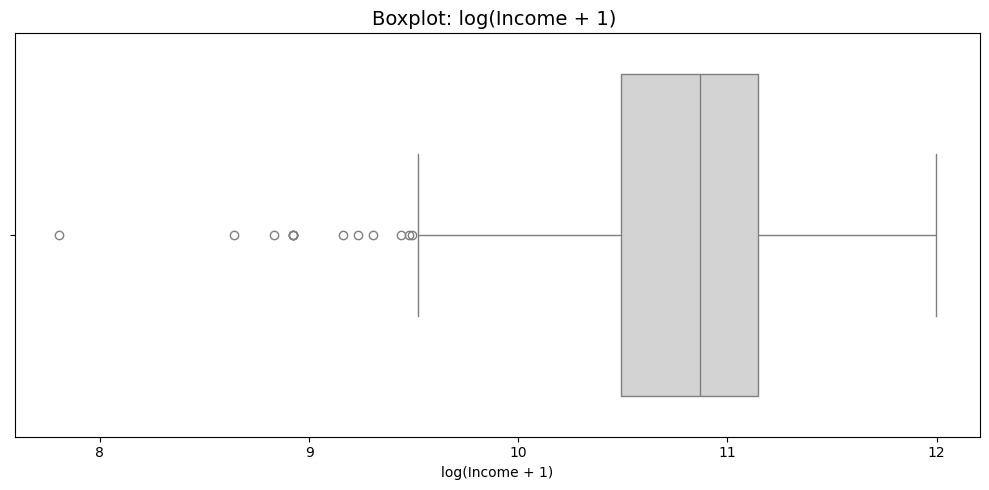

In [80]:
df['logIncome'] = np.log(df['Income'] + 1)

plt.figure(figsize=(10,5))
ax = sns.boxplot(x='logIncome', data=df, color='lightgray')
ax.set_title('Boxplot: log(Income + 1) ', fontsize=14)
ax.set_xlabel('log(Income + 1)')
plt.tight_layout()
plt.show()


1) Центр и разброс

    Медиана лог-дохода лежит примерно в районе ~10.8–11.0 (что соответствует сырым доходам ≈ 50–65k), на графике видно широкую «коробку» — межквартильный размах (IQR) велик. Это означает, что у выборки существенная внутригрупповая изменчивость доходов.

2) Скошенность распределения

    На лог-шкале распределение выглядит гораздо более симметричным по сравнению с сырым Income, но всё ещё видно неравномерность: большая часть наблюдений сосредоточена в среднем диапазоне лог(дохода), а есть «хвосты» в обе стороны. Это подтверждает, что логарифмирование уменьшило влияние экстремально больших значений и делает распределение удобнее для сравнения групп.

3) Выбросы

    На графике присутствуют отдельные точки за пределами усов: есть несколько наблюдений существенно ниже основного диапазона (малые доходы) и несколько — выше (очень большие доходы, которые мы раньше отмечали как > ~119k). Эти наблюдения влияют на оценку параметров и их нужно проверить отдельно: реальные «VIP» / высокие доходы или ошибки ввода.

4) Практическая интерпретация

    Логарифмирование оправдано: для дальнейшего анализа (сравнение по категориям, корреляция, регрессия) лучше использовать logIncome, т.к. оно снижает влияние экстремумов и делает методы, чувствительные к скошенности, более корректными.

### Как считались выбросы:

##### Общее правило:

* Вычисляется квартиль Q1 (25%-й перцентиль) и Q3 (75%-й перцентиль).

* Интерквартильный размах IQR = Q3 − Q1.

* Границы «допустимого диапазона» (fences):

* Нижняя граница = Q1 − 1.5 × IQR

* Верхняя граница = Q3 + 1.5 × IQR

* Точки, лежащие ниже нижней или выше верхней границы, считаются выбросами и отображаются кружками.

* «Усы» (whiskers) тянутся не до абсолютного минимума/максимума, а до наиболее отдалённой точки, лежащей внутри этих границ. Остальные точки — кружки (outliers).

##### Относительно этого boxplota что было сделано:

те же шаги IQR, но Q1/Q3 берутся по значениям log(Income+1). Нижняя/верхняя граница — в лог-шкале. Точки с log-значениями < нижней границы или > верхней — отмечены как выбросы.

### 7) Категория по числовому столбцу и boxplot по категориям

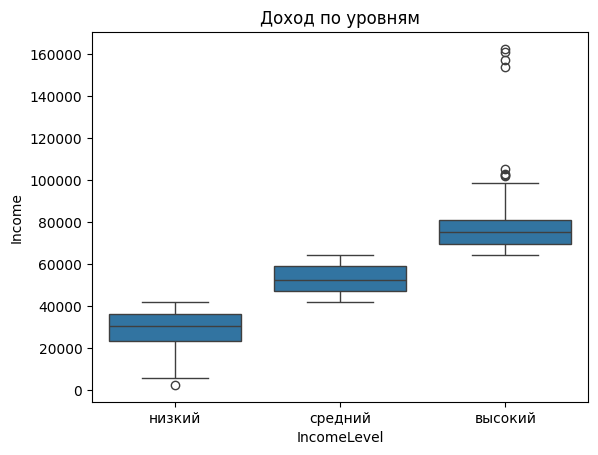

In [81]:

if 'Income' in df.columns:
    bins = df['Income'].quantile([0, 1/3, 2/3, 1]).values
    labels = ['низкий','средний','высокий']
    df['IncomeLevel'] = pd.cut(df['Income'], bins=bins, labels=labels, include_lowest=True)
    sns.boxplot(x='IncomeLevel', y='Income', data=df); plt.title('Доход по уровням'); plt.show()


1) Визуальная интерпретация

    Категории были получены делением по квантилям и показали ожидаемую упорядоченность: медиана дохода возрастает от «низкий» → «средний» → «высокий». Это говорит о том, что разбиение по квантилям адекватно выделяет уровни дохода и отражает реальные различия между группами.

2) Разброс и внутренняя вариативность

    Интерквартильный размах (IQR) в группах «средний» и «высокий» заметно больше, чем в «низком», то есть внутри этих групп доходы более разнородны. Группа «низкий» более компактна, но там тоже есть отдельные очень низкие значения.

3) Выбросы и влияние на анализ

    В группе «высокий» присутствуют выраженные правые выбросы (очень большие доходы). Эти выбросы смещают шкалу и влияют на средние — при анализе и моделировании стоит учитывать их влияние.

##### Общее правило:

* Вычисляется квартиль Q1 (25%-й перцентиль) и Q3 (75%-й перцентиль).

* Интерквартильный размах IQR = Q3 − Q1.

* Границы «допустимого диапазона» (fences):

* Нижняя граница = Q1 − 1.5 × IQR

* Верхняя граница = Q3 + 1.5 × IQR

* Точки, лежащие ниже нижней или выше верхней границы, считаются выбросами и отображаются кружками.

* «Усы» (whiskers) тянутся не до абсолютного минимума/максимума, а до наиболее отдалённой точки, лежащей внутри этих границ. Остальные точки — кружки (outliers).

##### Относительно этого boxplota что было сделано:

для каждого уровня (низкий / средний / высокий) отдельно берутся Q1, Q3, IQR и вычисляются свои границы Q1−1.5·IQR и Q3+1.5·IQR. Любые значения вне этих границ для конкретной группы считаются выбросами группы.

### 8) Два boxplot по другим категориям (разные библиотеки)

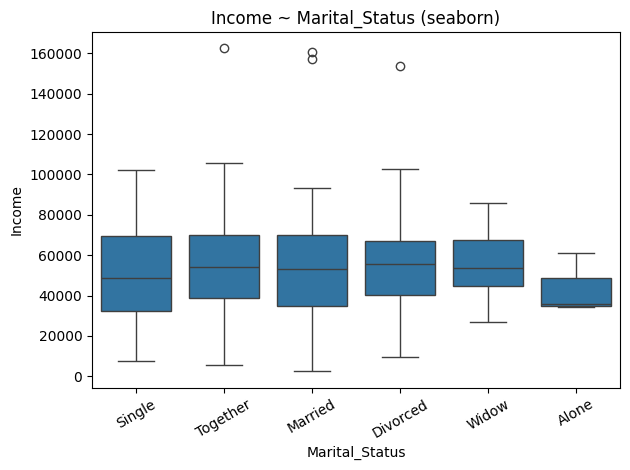

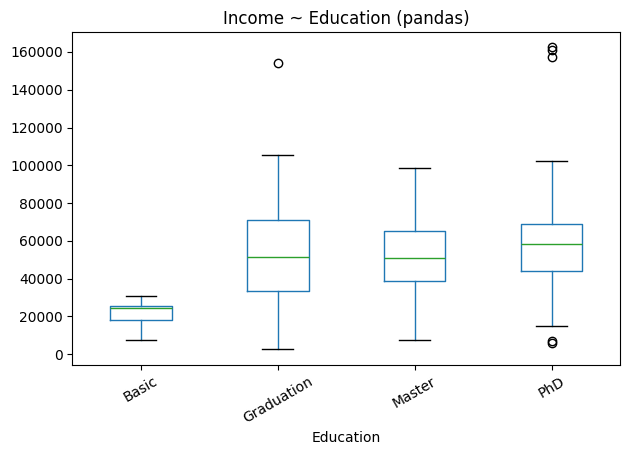

In [82]:
# === Boxplot seaborn: Income ~ Marital_Status ===
if all(c in df.columns for c in ['Marital_Status', 'Income']):
    data = df[['Marital_Status', 'Income']].dropna()
    if not data.empty and data['Income'].nunique() > 1:
        sns.boxplot(x='Marital_Status', y='Income', data=data)
        plt.title('Income ~ Marital_Status (seaborn)')
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно данных для boxplot (seaborn).")
else:
    print("Нет колонок для boxplot (seaborn).")


# === Boxplot pandas: Income ~ Education ===
if all(c in df.columns for c in ['Education', 'Income']):
    data = df[['Education', 'Income']].dropna()
    if not data.empty and data['Income'].nunique() > 1:
        data.boxplot(column='Income', by='Education', grid=False, rot=30)
        plt.title('Income ~ Education (pandas)')
        plt.suptitle('')
        plt.tight_layout()
        plt.show()
    else:
        print("Недостаточно данных для boxplot (pandas).")
else:
    print("Нет колонок для boxplot (pandas).")


#### Boxplot seaborn: Income ~ Marital_Status
* Что видно: медианы дохода по группам Marital_Status лежат примерно в одном диапазоне (порядка ~40–60k), то есть существенной разницы в медианах между статусами нет — разные семейные статусы не дают сильного различия в центральной тенденции дохода.

* Разброс (IQR) и диапазоны: у большинства групп большой межквартильный размах — это значит, что внутри групп наблюдается высокая вариативность доходов.

* Выбросы: есть явные высокие выбросы (очень высокие доходы — ~150–160k) в группах Together / Married (и, возможно, в других). Эти выбросы смещают среднее и расширяют «усы» на обычном boxplot.

* Вывод: семейный статус сам по себе не объясняет существенно различия в доходе (по медиане). Наличие выбросов и большой внутригрупповой разброс говорит, что фактор Marital_Status слаб для предсказания дохода в этой выборке.

##### Общее правило:

* Вычисляется квартиль Q1 (25%-й перцентиль) и Q3 (75%-й перцентиль).

* Интерквартильный размах IQR = Q3 − Q1.

* Границы «допустимого диапазона» (fences):

* Нижняя граница = Q1 − 1.5 × IQR

* Верхняя граница = Q3 + 1.5 × IQR

* Точки, лежащие ниже нижней или выше верхней границы, считаются выбросами и отображаются кружками.

* «Усы» (whiskers) тянутся не до абсолютного минимума/максимума, а до наиболее отдалённой точки, лежащей внутри этих границ. Остальные точки — кружки (outliers).

##### Относительно этого boxplota что было сделано:

отдельно для каждой категории семейного положения (Single / Together / Married / Divorced / Widow / Alone) — Q1/Q3/IQR и границы по правилу 1.5·IQR. Выбросы — точки вне этих границ, рисуются как кружки.

***

#### Boxplot pandas: Income ~ Education
* Что видно: ясно прослеживается положительная связь между уровнем образования и уровнем дохода: Basic — самая низкая медиана и узкий интерквартильный размах; Graduation, Master, PhD — значительно более высокие медианы.

* Разброс: у Graduation/Master/PhD значительно больший разброс доходов (широкие коробки и более длинные «усы»), то есть среди людей с высшим образованием больше как сильных, так и слабых значений дохода.

* Выбросы: у PhD и Graduation есть высокие выбросы >150k — возможно, это более «насыщенные» хвосты или редкие очень высокие доходы.

* Вывод: образование — более сильный объясняющий фактор дохода, чем семейный статус: более высокий уровень образования в среднем ассоциирован с более высоким доходом и большим разбросом.

##### Общее правило:

* Вычисляется квартиль Q1 (25%-й перцентиль) и Q3 (75%-й перцентиль).

* Интерквартильный размах IQR = Q3 − Q1.

* Границы «допустимого диапазона» (fences):

* Нижняя граница = Q1 − 1.5 × IQR

* Верхняя граница = Q3 + 1.5 × IQR

* Точки, лежащие ниже нижней или выше верхней границы, считаются выбросами и отображаются кружками.

* «Усы» (whiskers) тянутся не до абсолютного минимума/максимума, а до наиболее отдалённой точки, лежащей внутри этих границ. Остальные точки — кружки (outliers).

##### Относительно этого boxplota что было сделано:

для каждой категории образования (Basic, Graduation, Master, PhD) отдельно — Q1, Q3, IQR, границы 1.5·IQR; точки вне — выбросы.

### 9) Задание №1 индивидуального варианта (seaborn)


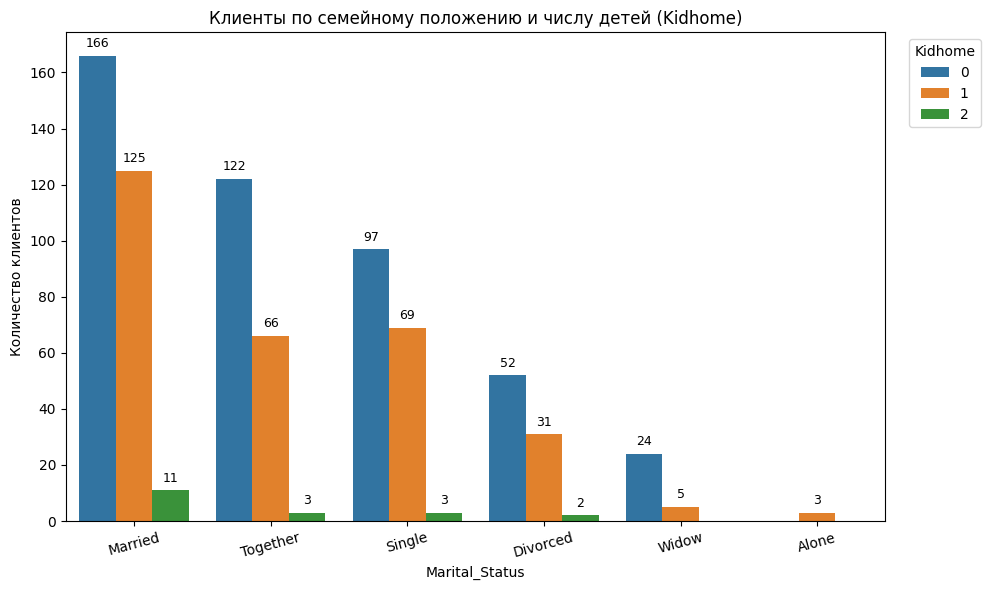

In [83]:
grp = df.groupby(['Marital_Status','Kidhome']).size().reset_index(name='count')

#упорядочим категории (если хотите свой порядок, замените)
marital_order = df['Marital_Status'].value_counts().index.tolist()  # порядок по частоте
kid_order = sorted(df['Kidhome'].dropna().unique())                # [0,1,2]

#--- рисуем barplot: x = Marital_Status, hue = Kidhome ---
plt.figure(figsize=(10,6))
ax = sns.barplot(data=grp, x='Marital_Status', y='count', hue='Kidhome',
                 order=marital_order, hue_order=kid_order, palette='tab10')

ax.set_title('Клиенты по семейному положению и числу детей (Kidhome)')
ax.set_xlabel('Marital_Status')
ax.set_ylabel('Количество клиентов')

plt.legend(title='Kidhome', bbox_to_anchor=(1.02,1), loc='upper left')

#подписи значений над каждой группой столбцов
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(int(h),
                    (p.get_x() + p.get_width() / 2., h),
                    ha='center', va='bottom',
                    fontsize=9, xytext=(0, 4), textcoords='offset points')

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


График показывает, что большинство клиентов — Married и Single. Для каждой категории семейного положения наиболее частое значение Kidhome = 0 (т.е. клиенты без детей) — это заметно сильнее, чем 1 или 2 детей. Категория Married даёт самый большой вклад среди клиентов с 0 и 1 ребёнком; Together и Single тоже существенны, но меньше. Категории Widow и Alone редки. Вывод: семейное положение тесно связано с распределением по числу детей в нашей выборке — большинство клиентов семейного типа без детей, а многодетных немного.

### 10) Задание №2 индивидуального варианта (pandas + plot)


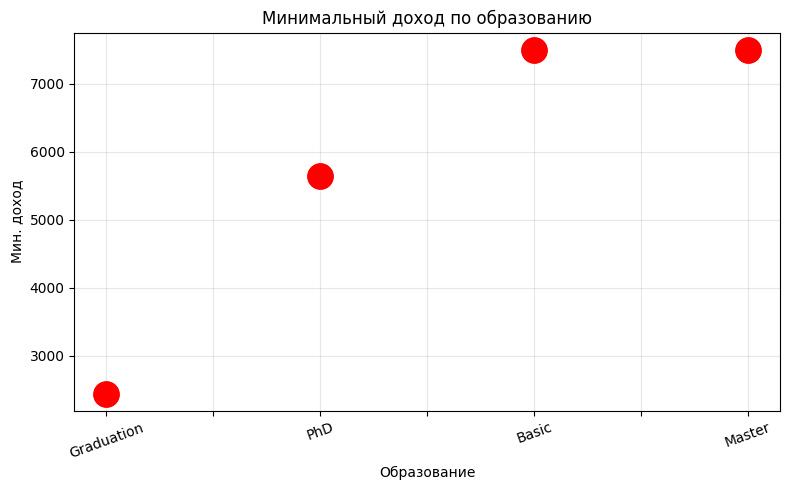

In [84]:

#Pivot: min Income by Education
pivot_min_income = df.pivot_table(index='Education', values='Income', aggfunc='min').dropna()
pivot_min_income = pivot_min_income.sort_values('Income')

ax = pivot_min_income.plot(kind='line', marker='o', linestyle='None', markersize=18, color='red', legend=False, figsize=(8,5))
ax.set_title('Минимальный доход по образованию')
ax.set_xlabel('Образование')
ax.set_ylabel('Мин. доход')
ax.grid(True, alpha=0.3)
# если нужно показать подпись "Income" как в примере:
ax.scatter(pivot_min_income.index, pivot_min_income['Income'], s=18**2, c='red')  # опционально
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



На точечном графике (и на маркерах) видна явная разница между категориями образования: у людей с образованием Graduation минимальный доход заметно ниже, а Master/Basic/PhD — выше. Это можно интерпретировать так: минимальный уровень дохода увеличивается с более высоким образованием в среднем, хотя у некоторых категорий (например, Master и Basic) наблюдается близкая минимальная граница. Вывод: образование похоже связано с нижней границей дохода — более высокое образование ассоциируется с более высоким минимальным доходом.

### 11) Задание №3 индивидуального варианта (matplotlib)


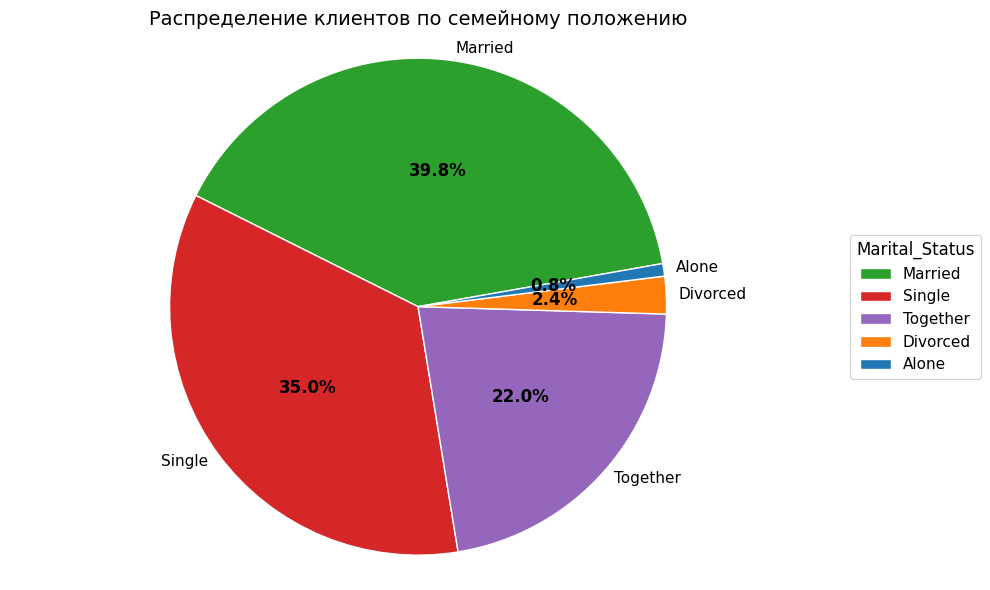

In [85]:
filt = df[df['Year_Birth'] > 1980]
order = ['Married', 'Single', 'Together', 'Divorced', 'Alone']
pie_data = filt['Marital_Status'].value_counts().reindex(order).fillna(0)

labels = pie_data.index.tolist()
sizes = pie_data.values

#Цвета
colors = ['#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#1f77b4']



fig, ax = plt.subplots(figsize=(10, 6))

#Рисуем
res = ax.pie(
    sizes,
    labels=labels,          #подписи категорий
    autopct='%1.1f%%',      #проценты внутри секторов
    startangle=10,
    colors=colors,
    pctdistance=0.55,      #расстояние процентов от центра
    labeldistance=1.05,    #расстояние меток (категорий) от центра
    wedgeprops=dict(edgecolor='w')
)

#корректная распаковка (matplotlib может вернуть 2 или 3 значения)
if len(res) == 3:
    wedges, texts, autotexts = res
else:
    wedges, texts = res
    autotexts = []

#Настроим шрифты
for t in texts:
    t.set_fontsize(11)
    t.set_fontweight('normal')

for at in autotexts:
    at.set_fontsize(12)
    at.set_color('black')
    at.set_fontweight('bold')

#Заголовок и легенда
ax.set_title('Распределение клиентов по семейному положению', fontsize=14)
ax.legend(wedges, labels, title='Marital_Status',
          fontsize=11, title_fontsize=12,
          bbox_to_anchor=(1.02, 0.5), loc='center left')

ax.axis('equal') 
plt.tight_layout()
plt.show()

Среди клиентов моложе (или родившихся после 1980) наибольшая доля — Married (~39.8%), затем Single (~35%) и Together (~22%). Divorced и Alone составляют очень маленькие доли (пару процентов и меньше). Вывод: в подвыборке Year_Birth > 1980 доминируют семейные и одинокие клиенты, при этом «вместе» (пары без формального брака) также заметна. Это указывает, что молодое поколение в выборке распределено между семейными и одинокими статусами, а доли разводов/одиночек малы.

### Общий вывод

1. Загрузка и первичная обработка данных
Что сделано: файл загружен в pandas; выведены df.info() и df.describe(include='all'). Приведены типы столбцов, дата Dt_Customer распарсена в datetime, вычислен столбец AgeReg = год регистрации − Year_Birth. Найдены и исправлены неявные дубликаты в категориях (например, 'MARRIED' → 'Married', 'SINGL' → 'Single'), удалены явные дубликаты (drop_duplicates), проверены пропуски. Подсчитаны пропуски по столбцам. Удалены строки с пустым Income (12 строк). Заполнены единичные пропуски Kidhome и NumDealsPurchases нулями. Выявлены и удалены явные возрастные аномалии (строки вне разумного диапазона), итоговый размер набора — 779 строк.
Что получили: чистый датафрейм из 779 наблюдений с корректными типами (int, float, datetime, object), без явных дубликатов и без пропусков в ключевых полях (после обработки). Статистики: mean Income ≈ 53098, median ≈ 52614, std ≈ 21818, min ≈ 2447, max ≈ 162397; mean AgeReg ≈ 44.6.
Что это значит: данные подготовлены для анализа и визуализаций — преобразование дат и удаление/заполнение пропусков уменьшили риск ошибок в вычислениях (например, при вычислении возраста и при группировках). Удаление строк с пустым Income повлияло на размер выборки, но было оправдано, т.к. Income — ключевая переменная для большинства дальнейших графиков.

2. Матрица диаграмм рассеяния (pairplot) и scatter по категориям
Что сделано: построен pairplot (частично — выборка признаков: AgeReg, logIncome, NumDealsPurchases, Kidhome и т.д.), дополнительно — scatter plot Income (или logIncome) vs NumDealsPurchases с цветовой группировкой по Marital_Status (hue). Для плотных областей использован jitter на оси y при необходимости.
Что получили: в матрице видно: распределения AgeReg приблизительно нормальные, logIncome сконцентрирован в узком диапазоне после логарифмирования; NumDealsPurchases — резко скошенное распределение (много 0–3); Kidhome — дискретный признак с пиками в 0 и 1; точки для разных marital status заметно перекрываются на графиках доходов и числа покупок. По парным диаграммам нет ярко выраженных сильных линейных зависимостей между большинством пар признаков.
Что это значит: на первых взглядах нет очевидных простых линейных зависимостей, которые можно было бы использовать без преобразований — например, число сделок почти не коррелирует прямо с доходом (видно сильное перекрытие). Цветовая разбивка по семейному положению показывает, что категории частично отличаются по частотам, но не образуют чисто разделяющихся групп по доходам или покупкам.

3. Гистограммы для числовых признаков
Что сделано: построены гистограммы Year_Birth, Income, logIncome, NumDealsPurchases и т.д. Подобрано количество bins (примерно 20–30 в разных графиках, для Income использовали pandas histogram). На графиках проставлены медиана/среднее/вертикальные линии там, где нужно.
Что получили: Year_Birth — примерно нормальное распределение (централизовано около ~1969); Income — сильно правосторонне скошенное распределение с несколькими крупными выбросами (макс ~162k), логарифмирование (logIncome) делает распределение более симметричным; NumDealsPurchases — распределение с массой в 0–3 (мало клиентов с большим числом сделок); Kidhome — дискретное распределение (0,1,2) с большинством 0.
Что это значит: при моделировании дохода логарифмирование оправдано (уменьшает скошенность и делает распределение более нормальным). Наличие крупных выбросов по Income требует внимания (robust методы, отсечение/внимательное изучение причин). Для дискретных переменных (NumDealsPurchases, Kidhome) лучше использовать подходящие счетные/категориальные методы.

4. Корреляция и ковариация (heatmap)
Что сделано: вычислены матрицы Pearson и Spearman, построен heatmap (annot=True). Для ковариации вычислена таблица ковариаций (cov). Некоторые признаки исключены (ID, Year_Birth) при построении финальной матрицы.
Что получили: Pearson: сильная линейная связь Income ↔ logIncome (~+0.94), заметная отрицательная связь Income ↔ Kidhome (~−0.51), слабая/практически нулевая корреляция Income ↔ NumDealsPurchases (~−0.05), слабая положительная связь AgeReg ↔ logIncome (~0.17). Spearman показывает похожую картину, но отражает ранговые связи (Kidhome также отрицательно связан с доходом). Ковариации показали те же направления, но с масштабированными числам (веса зависят от шкалы).
Что это значит: корреляция подтверждает, что log-преобразование тесно связано с исходным Income (логично) и что семьи с большим количеством детей в среднем имеют более низкий доход (отрицательная связь). Низкая корреляция между доходом и числом сделок говорит, что доход сам по себе плохо прогнозирует активность в покупках — нужны дополнительные признаки или нелинейные подходы. Ковариация полезна для понимания абсолютного масштаба совместной изменчивости, но для сравнения степени связи лучше смотреть нормированную корреляцию.

5. Графики по варианту (barplot, pivot, pie) и интерпретация
Что сделано:
• Групповой barplot: количество клиентов по Kidhome (0/1/2) для каждого Marital_Status (seaborn.barplot с legend по Kidhome и подписями сверху столбцов).
• Pivot-table: минимальный доход по уровню образования (pivot_table, затем scatter/plot с большими красными маркерами).
• Pie: круговая диаграмма семейного положения для клиентов с Year_Birth > 1980 с подписями процентов внутри и легендой с категориями.
Что получили:
• Barplot: Married и Together доминируют по количеству, у Married много клиентов без детей (Kidhome=0); доля клиентов с 2 детьми мала.
• Pivot: минимальный доход по образованию: Basic — самый низкий минимум, Graduation/PhD/Master — значительно выше (PhD/Graduation — высокие минимумы), что указывает на разброс доходов по образованию.
• Pie: среди рожденных после 1980 чаще всего Married (~39.8%) и Single (~35%), затем Together (~22%).
Что это значит: семейное положение и число детей влияют на распределение клиентов по группам (полезно для сегментации). Образование заметно связано с нижней границей дохода — может быть полезно в таргетинге. Доля молодых клиентов (Year_Birth > 1980) распределена между Married и Single, это важно при планировании маркетинга.

6. Hexbin графики (hexagonal binning), в том числе LogNorm
Что сделано: построены hexbin Income vs NumDealsPurchases и logIncome vs NumDealsPurchases; использована цветовая шкала и в одном варианте LogNorm (логарифмическая нормировка цветов) для корректного отображения плотных и редких бинов. Ограничены оси по квантилям, подобраны gridsize.
Что получили: плотность наблюдений сосредоточена в диапазоне logIncome ≈ 10.5–11.1 и NumDeals ≈ 0–3; с лог-нормализацией видно многослойную структуру плотности (где много точек — ярче). Много пустых или малонаселённых бинов в хвостах (высокие доходы, редкие большие числа покупок).
Что это значит: hexbin хорошо показывает плотность и структуру плотных областей вместо бессмысленного облака точек при сильной плотности. Основная клиентская масса — средний доход, небольшое число покупок; сегменты с высоким доходом и высокой частотой покупок встречаются редко, их следует изучать отдельно.

7. Boxplot одного столбца (Income / logIncome)
Что сделано: построены boxplot для Income и для logIncome (seaborn и matplotlib). Вычислены медиана, IQR, верхняя граница 1.5IQR; отмечено количество наблюдений выше порога.
Что получили: Income — выраженная скошенность вправо, широкий IQR и несколько удалённых выбросов (несколько значений намного выше 100k). После лог-преобразования распределение становится более симметричным, выбросы уменьшают влияние на визуализацию, медиана по logIncome около 10.6 (т.е. исходная медиана ≈ 52k). Было отмечено небольшое число наблюдений выше 1.5IQR (4 строки по оценке).
Что это значит: наличие выбросов по доходу — реальная особенность данных, стоит рассматривать как отдельную группу или использовать робастные методы (медиана, квантильные регрессии) для моделирования дохода. Логарифмирование помогает при применении моделей, чувствительных к нормальности.

8. Категория по числовому столбцу и boxplot по категориям (IncomeLevel)
Что сделано: Income разделён на три категории по квартилям/третям (labels 'низкий','средний','высокий' через pd.cut), затем построен boxplot Income по IncomeLevel.
Что получили: медианы и IQR по группам растут от «низкий» → «средний» → «высокий», причём в группе «высокий» видны явные выбросы и более широкий разброс.
Что это значит: разбиение дохода на категории подтвердило ожидаемую градацию — оно пригодно для сегментации и для построения сравнительных boxplot, где видно внутреннюю вариативность каждой категории.

9. Ещё минимум 2 boxplot по другим категориям (разные библиотеки)
Что сделано: построены boxplot Income ~ Marital_Status (seaborn) и Income ~ Education (pandas). Использованы разные библиотеки визуализации.
Что получили: по Education — более выраженные различия (Basic значительно ниже, PhD/Graduation/ Master — выше, но с перекрытием и выбросами), по Marital_Status — распределения схожи и сильно перекрываются, хотя у некоторых статусов медианы/диапазоны немного отличаются.
Что это значит: образование лучше разделяет по доходу, чем семейный статус. Для прогнозирования дохода Education — стабильный предиктор; Marital_Status сам по себе малоинформативен без других признаков.

10. Общие выводы и рекомендации (итог по работе)
Что сделано: полный EDA — загрузка, очистка, преобразования, визуализации (hist, pairplot, scatter by category, hexbin, boxplot, bar/pivot/pie), матрицы корреляций и ковариаций, выделение признаков для дальнейшего анализа (logIncome, AgeReg, категориальные кодировки).
Что получили: готовую к анализу/моделированию таблицу из 779 записей, описание распределений и связей между признаками. Ключевые наблюдения: сильная связь Income↔logIncome; отрицательная связь Income↔Kidhome (семьи с детьми в среднем имеют ниже доход); слабая или отсутствующая прямая связь Income↔NumDealsPurchases; основная масса клиентов — средний доход и невысокая покупательская активность; Education — сильный фактор, ассоциированный с исходным уровнем дохода; в данных есть отдельные крупные выбросы по доходу, требующие отдельного внимания.